In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

- Tratamiento de los dos data que hablan sobre movimientos de los usuarios

In [2]:
df1 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_1.txt')

In [3]:
df2 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_2.txt')

In [4]:
df1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [5]:
df2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

- Tratamiento del demo final 

In [6]:
df_web_data = pd.concat([df1, df2], axis=0)

In [16]:
demo = pd.read_csv("CSV/df_final_demo.txt", low_memory=False)

In [17]:
demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [18]:
demo = demo.fillna('Unknown')

In [19]:
demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [20]:
frequency_gendr = demo['gendr'].value_counts()
frequency_gendr

gendr
U          24122
M          23724
F          22746
Unknown       14
X              3
Name: count, dtype: int64

In [21]:
frequency_table2 = demo['gendr'].value_counts(normalize=True).head(3)

In [26]:
demo['clnt_age'] = pd.to_numeric(demo['clnt_age'], errors='coerce')


In [25]:
demo_filtrado.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [27]:
demo_filtrado = demo[demo['clnt_age'].between(20, 80)]

<Axes: xlabel='clnt_age', ylabel='Count'>

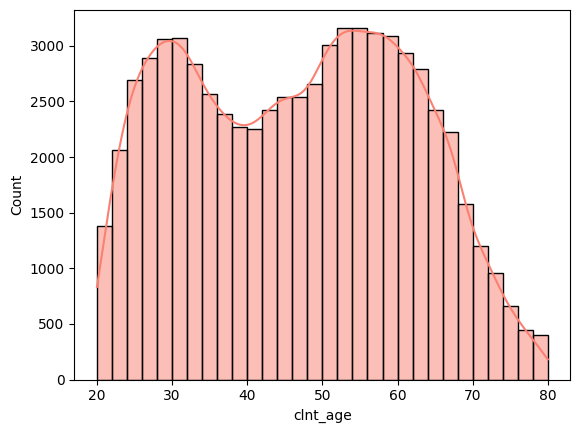

In [28]:
sns.histplot(demo_filtrado['clnt_age'], kde=True, bins=30, color="salmon")

In [30]:
demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


C:\Users\noeli\AppData\Local\Temp\ipykernel_28648\3113405766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


In [31]:
demo_filtrado['bal'] = demo_filtrado['bal'].round(2)

C:\Users\noeli\AppData\Local\Temp\ipykernel_28648\672603886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = demo_filtrado['bal'].round(2)


In [32]:
demo_filtrado

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [33]:
frequency_bal = demo_filtrado['bal'].value_counts()

proportion_bal = demo_filtrado['bal'].value_counts(normalize=True)

frequency_bal, proportion_bal

(bal
 31188.62     5
 29388.51     4
 31398.74     3
 29389.11     3
 24953.79     3
             ..
 135143.26    1
 25561.22     1
 41751.20     1
 32797.00     1
 522498.72    1
 Name: count, Length: 68510, dtype: int64,
 bal
 31188.62     0.000073
 29388.51     0.000058
 31398.74     0.000044
 29389.11     0.000044
 24953.79     0.000044
                ...   
 135143.26    0.000015
 25561.22     0.000015
 41751.20     0.000015
 32797.00     0.000015
 522498.72    0.000015
 Name: proportion, Length: 68510, dtype: float64)